# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [63]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [64]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count  
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [74]:
# Set the API base URL
url = f"http://api.openweathermap.org/data/2.5/weather?&units=Metric&appid=c5990ccb1a0a93e7c7f342321a262615&q="

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 0
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")


Beginning Data Retrieval     
-----------------------------
Processing Record 0 of Set 1 | vingt cinq
City not found. Skipping...
Processing Record 1 of Set 1 | yellowknife
Processing Record 2 of Set 1 | vanino
Processing Record 3 of Set 1 | gadzhiyevo
Processing Record 4 of Set 1 | tofol
Processing Record 5 of Set 1 | taiohae
City not found. Skipping...
Processing Record 6 of Set 1 | port-aux-francais
Processing Record 7 of Set 1 | bethel
Processing Record 8 of Set 1 | afaahiti
Processing Record 9 of Set 1 | georgetown
Processing Record 10 of Set 1 | grytviken
Processing Record 11 of Set 1 | tinghir
Processing Record 12 of Set 1 | college
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | isafjordur
Processing Record 15 of Set 1 | zapadnaya dvina
Processing Record 16 of Set 1 | waitangi
Processing Record 17 of Set 1 | guangyuan
Processing Record 18 of Set 1 | ribeira grande
Processing Record 19 of Set 1 | fuvahmulah
City not found. Skipping...
Processing Record 2

In [80]:
# Convert the dictionary to a DataFrame
city_data_df = pd.DataFrame(city_data)

# Count the number of values in each column
column_counts = city_data_df.count()
column_counts

City          562
Lat           562
Lng           562
Max Temp      562
Humidity      562
Cloudiness    562
Wind Speed    562
Country       562
Date          562
dtype: int64

In [81]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,yellowknife,62.4560,-114.3525,15.31,58,75,3.09,CA,1684979826
1,vanino,49.0869,140.2543,25.66,33,89,1.11,RU,1684979826
2,gadzhiyevo,69.2551,33.3362,10.97,69,100,8.17,RU,1684979826
3,tofol,5.3248,163.0078,28.41,73,28,4.81,FM,1684979832
4,port-aux-francais,-49.3500,70.2167,5.84,99,100,8.21,TF,1684979832


In [84]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [127]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,15.31,58,75,3.09,CA,1684979826
1,vanino,49.0869,140.2543,25.66,33,89,1.11,RU,1684979826
2,gadzhiyevo,69.2551,33.3362,10.97,69,100,8.17,RU,1684979826
3,tofol,5.3248,163.0078,28.41,73,28,4.81,FM,1684979832
4,port-aux-francais,-49.3500,70.2167,5.84,99,100,8.21,TF,1684979832


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

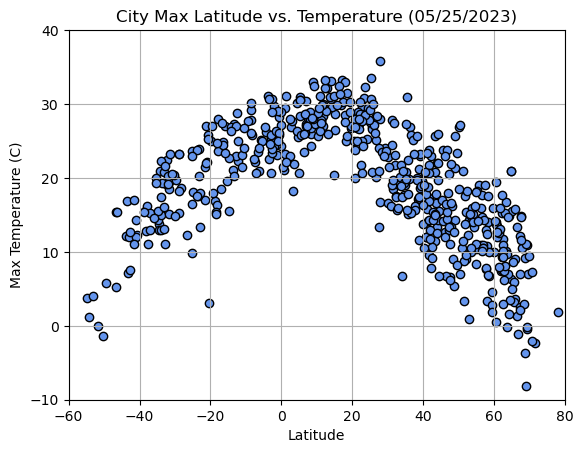

In [111]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Max Temp"],edgecolors="black",facecolors="cornflowerblue");
plt.title("City Max Latitude vs. Temperature (05/25/2023)");
plt.xlabel("Latitude");
plt.ylabel("Max Temperature (C)");
plt.xlim(-60, 80)
plt.ylim(-10, 40)
plt.grid (visible=True,linestyle="-");

# Save the figure
plt.savefig("output_data/Fig1.png");
# Show plot
plt.show()

#### Latitude Vs. Humidity

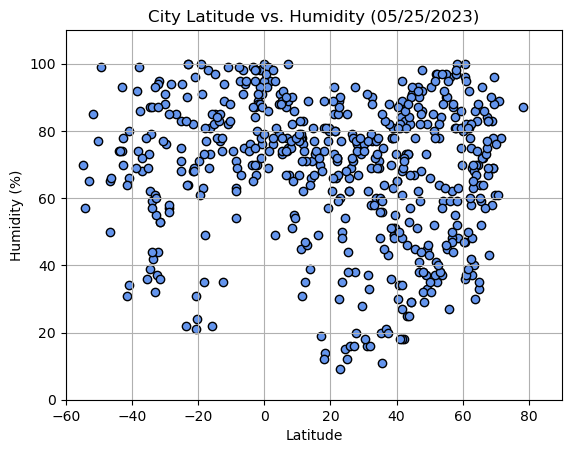

In [114]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Humidity"],edgecolors="black",facecolors="cornflowerblue")
plt.title("City Latitude vs. Humidity (05/25/2023)")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.xlim(-60, 90)
plt.ylim(0, 110)
plt.grid (visible=True,linestyle="-")

# Save the figure
plt.savefig("output_data/Fig2.png")
# Show plot
plt.show()

#### Latitude Vs. Cloudiness

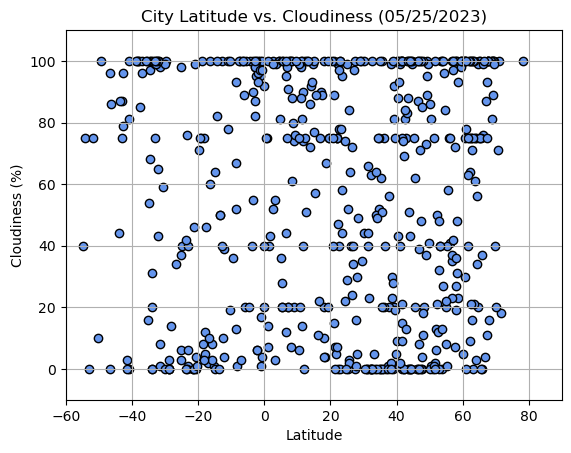

In [116]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Cloudiness"],edgecolors="black",facecolors="cornflowerblue")
plt.title("City Latitude vs. Cloudiness (05/25/2023)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.xlim(-60, 90)
plt.ylim(-10, 110)
plt.grid (visible=True,linestyle="-")

# Save the figure
plt.savefig("output_data/Fig3.png")
# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

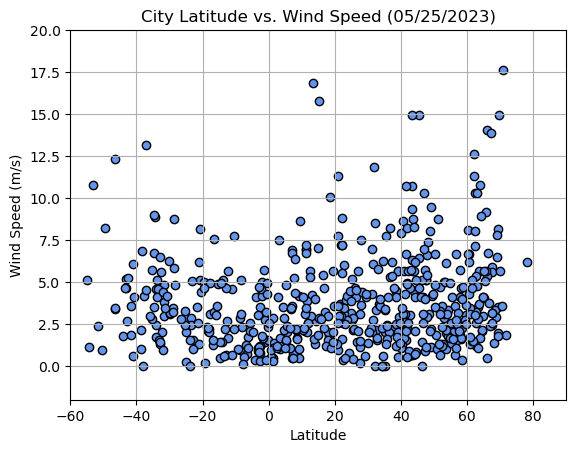

In [120]:
# Build scatter plot for latitude vs. temperature
# Incorporate the other graph properties
plt.scatter(city_data_df["Lat"],city_data_df["Wind Speed"],edgecolors="black",facecolors="cornflowerblue")
plt.title("City Latitude vs. Wind Speed (05/25/2023)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.xlim(-60, 90)
plt.ylim(-2, 20)
plt.grid (visible=True,linestyle="-")

# Save the figure
plt.savefig("output_data/Fig4.png")
# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [132]:
# Define a function to create Linear Regression plots
def line_regress(x_values, y_values, x_label, y_label):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    #calculate position for annotating line equation
    x_pos = min(x_values) + 0.1 * (max(x_values) - min(x_values))
    y_pos = min(y_values) + 0.9 * (max(y_values) - min(y_values))
    plt.annotate(line_eq,(x_pos, y_pos),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    print(f"The r-value is: {rvalue}")

In [129]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,yellowknife,62.4560,-114.3525,15.31,58,75,3.09,CA,1684979826
1,vanino,49.0869,140.2543,25.66,33,89,1.11,RU,1684979826
2,gadzhiyevo,69.2551,33.3362,10.97,69,100,8.17,RU,1684979826
3,tofol,5.3248,163.0078,28.41,73,28,4.81,FM,1684979832
5,bethel,41.3712,-73.4140,14.19,84,100,3.09,US,1684979832


In [130]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,port-aux-francais,-49.3500,70.2167,5.84,99,100,8.21,TF,1684979832
6,afaahiti,-17.7500,-149.2833,27.93,77,46,3.09,PF,1684979832
8,grytviken,-54.2811,-36.5092,1.14,57,75,1.13,GS,1684979832
11,hermanus,-34.4187,19.2345,13.78,87,97,8.90,ZA,1684979833
14,waitangi,-43.9535,-176.5597,12.12,74,44,1.79,NZ,1684979833


###  Temperature vs. Latitude Linear Regression Plot

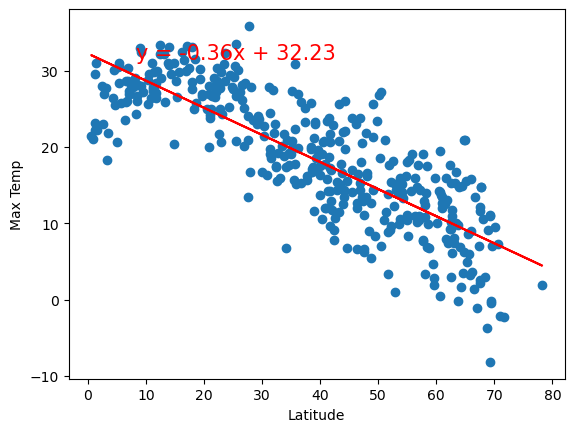

The r-value is: -0.8168083128530719


In [152]:
# Linear regression on Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Max Temp"], "Latitude", "Max Temp");


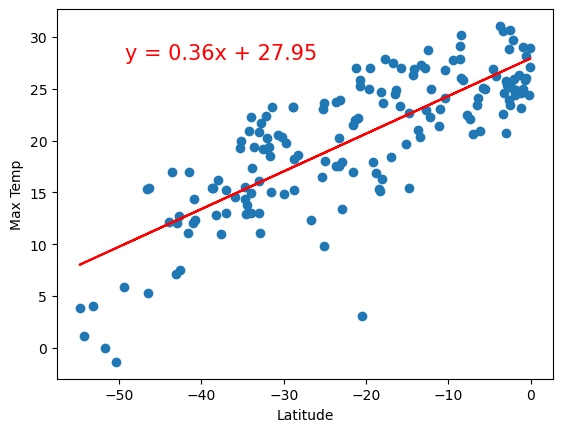

The r-value is: 0.8020988620413775


In [153]:
# Linear regression on Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Max Temp"], "Latitude", "Max Temp")


**Discussion about the linear relationship:** The plots above display how the max temperature of given cities are affected by their position in relation to the equator. The closer to the equator a city is, the warmer its temperature will. The farther away from the equator, the colder the city will be. The respective r-values so close to 1 and -1 prove these strong relationships. 

### Humidity vs. Latitude Linear Regression Plot

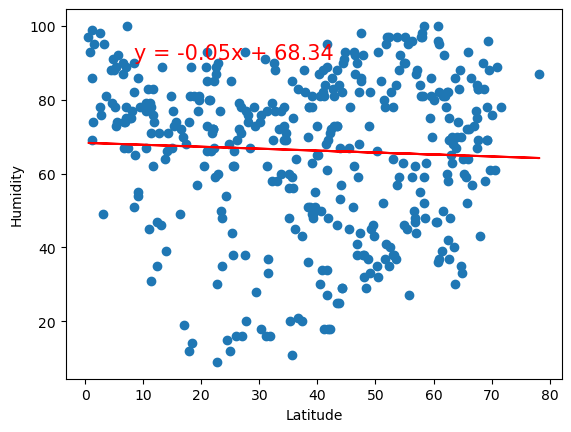

The r-value is: -0.04869845588362658


In [154]:
# Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Humidity"], "Latitude", "Humidity")


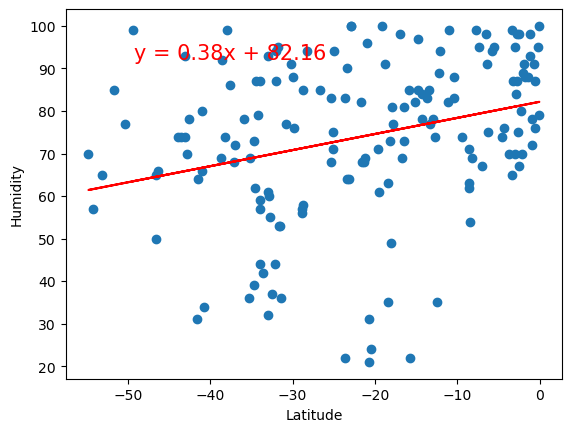

The r-value is: 0.2933625854758391


In [155]:
# Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Humidity"], "Latitude", "Humidity")


**Discussion about the linear relationship:** Based on the plots, it appears the relationship between position in regards to the equator and humidity is fairly small, especially in the Northern hemisphere. The small angles of the regression lines and corresponding r-values support this conclusion. However, there is a stronger relationship between latitude and humidity in the Souther hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

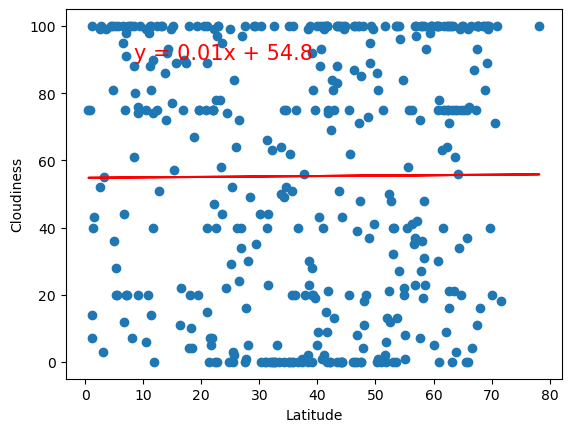

The r-value is: 0.006778396335756619


In [156]:
# Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")


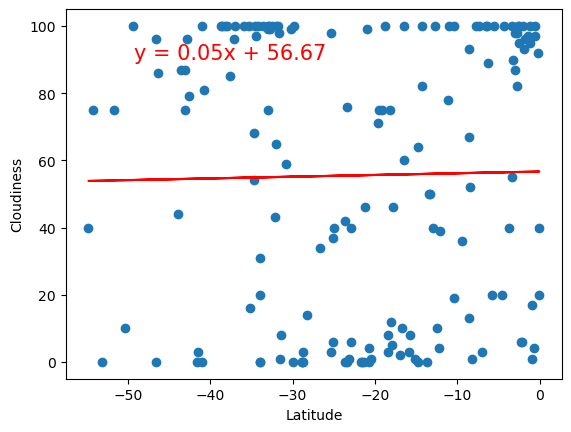

The r-value is: 0.018392379215585945


In [157]:
# Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Cloudiness"], "Latitude", "Cloudiness")


**Discussion about the linear relationship:** Based on the two plots and the r-values so close to zero, the relationship between cloudiness and proximity to the equator is very weak in both hemispheres. 

### Wind Speed vs. Latitude Linear Regression Plot

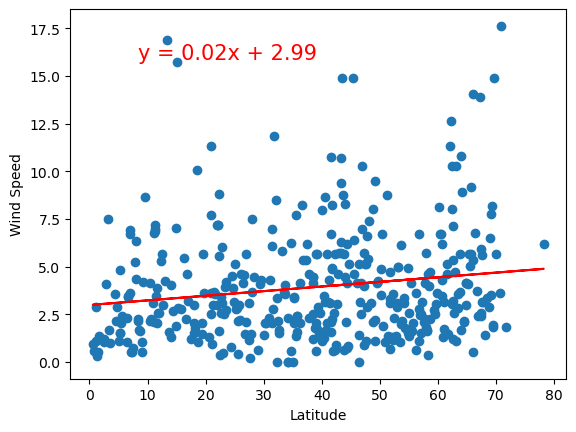

The r-value is: 0.1628103353622664


In [158]:
# Northern Hemisphere
line_regress(northern_hemi_df["Lat"], northern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")


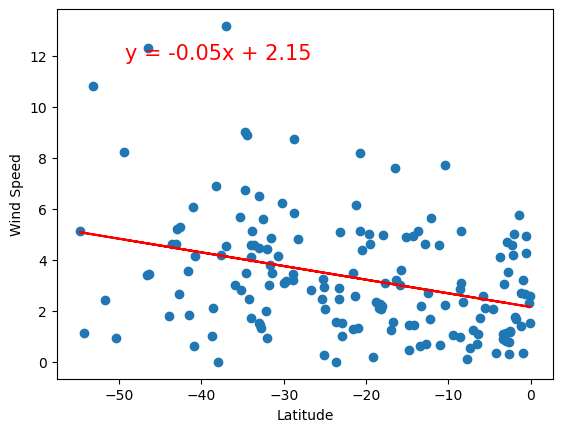

The r-value is: -0.33476501835614714


In [159]:
# Southern Hemisphere
line_regress(southern_hemi_df["Lat"], southern_hemi_df["Wind Speed"], "Latitude", "Wind Speed")


**Discussion about the linear relationship:** Based on the two plots, the correlation between wind and latitude for both hemispheres can be categorized as weak. With a slight positive r-value for the northern hemisphere and slight negative for the southern hemisphere, a small relationship between latitude and wind speed can be recognized. 